<a href="https://colab.research.google.com/github/AntonMarsovich/lab2/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Загрузка данных
df = pd.read_csv('crime_data.csv')

# Ознакомление с первыми строками
df.head()

# Общая информация о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6638 entries, 0 to 6637
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Disposition          6638 non-null   object 
 1   OffenderStatus       6638 non-null   object 
 2   Offender_Race        6638 non-null   object 
 3   Offender_Gender      6638 non-null   object 
 4   Offender_Age         6638 non-null   float64
 5   PersonType           6638 non-null   object 
 6   Victim_Race          6638 non-null   object 
 7   Victim_Gender        6638 non-null   object 
 8   Victim_Age           6638 non-null   float64
 9   Victim_Fatal_Status  6638 non-null   object 
 10  Report Type          6638 non-null   object 
 11  Category             6638 non-null   object 
dtypes: float64(2), object(10)
memory usage: 622.4+ KB


In [14]:
import pandas as pd

# Загрузка данных из CSV файла
crime_data = pd.read_csv('crime_data.csv')

# Проверка первых строк данных
print(crime_data.head())

  Disposition OffenderStatus Offender_Race Offender_Gender  Offender_Age  \
0      CLOSED       ARRESTED         BLACK            MALE          30.0   
1      CLOSED       ARRESTED         BLACK            MALE          30.0   
2      CLOSED       ARRESTED         BLACK            MALE          30.0   
3      CLOSED       ARRESTED         BLACK            MALE          30.0   
4      CLOSED       ARRESTED         BLACK            MALE          30.0   

  PersonType Victim_Race Victim_Gender  Victim_Age Victim_Fatal_Status  \
0     VICTIM       BLACK        FEMALE        29.0           Non-fatal   
1     VICTIM       BLACK        FEMALE        29.0           Non-fatal   
2     VICTIM       BLACK        FEMALE        29.0           Non-fatal   
3     VICTIM       BLACK        FEMALE        29.0           Non-fatal   
4     VICTIM       BLACK        FEMALE        29.0           Non-fatal   

           Report Type Category  
0  Supplemental Report    Theft  
1  Supplemental Report    Thef

In [7]:
# Преобразуем все текстовые данные (категориальные столбцы) в строковый тип
categorical_columns = [
    'Disposition', 'OffenderStatus', 'Offender_Race', 'Offender_Gender',
    'PersonType', 'Victim_Race', 'Victim_Gender', 'Victim_Fatal_Status',
    'Report Type', 'Category'
]



In [8]:
import pandas as pd

# Загрузка данных
df = pd.read_csv('crime_data.csv')

# Ознакомление с первыми строками
df.head()

# Общая информация о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6638 entries, 0 to 6637
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Disposition          6638 non-null   object 
 1   OffenderStatus       6638 non-null   object 
 2   Offender_Race        6638 non-null   object 
 3   Offender_Gender      6638 non-null   object 
 4   Offender_Age         6638 non-null   float64
 5   PersonType           6638 non-null   object 
 6   Victim_Race          6638 non-null   object 
 7   Victim_Gender        6638 non-null   object 
 8   Victim_Age           6638 non-null   float64
 9   Victim_Fatal_Status  6638 non-null   object 
 10  Report Type          6638 non-null   object 
 11  Category             6638 non-null   object 
dtypes: float64(2), object(10)
memory usage: 622.4+ KB


In [16]:
crime_data['Offender_Age'] = crime_data['Offender_Age'].astype('Int64')

# Преобразуем столбец 'Victim_Age' в тип 'Int64' для поддержки NaN значений
crime_data['Victim_Age'] = crime_data['Victim_Age'].astype('Int64')

In [18]:
print(crime_data.dtypes)

Disposition            object
OffenderStatus         object
Offender_Race          object
Offender_Gender        object
Offender_Age            Int64
PersonType             object
Victim_Race            object
Victim_Gender          object
Victim_Age              Int64
Victim_Fatal_Status    object
Report Type            object
Category               object
dtype: object


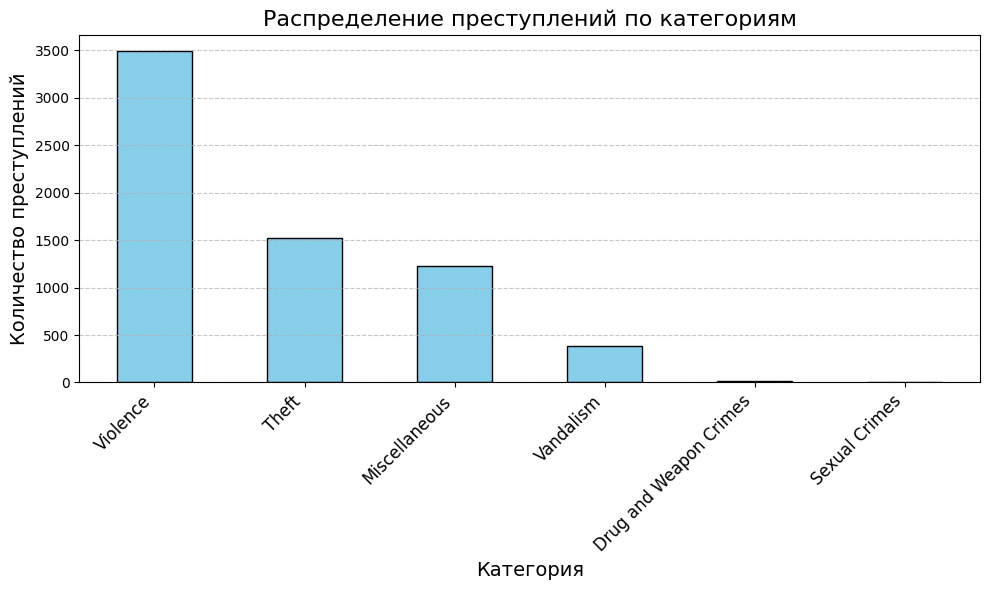

In [20]:
import matplotlib.pyplot as plt

# Подсчет количества преступлений по категориям
crime_counts = crime_data['Category'].value_counts()

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
crime_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Настройка графика
plt.title('Распределение преступлений по категориям', fontsize=16)
plt.xlabel('Категория', fontsize=14)
plt.ylabel('Количество преступлений', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Показ графика
plt.tight_layout()
plt.show()

In [30]:
print(y.value_counts())# Проверим распределение классов
class_counts = y.value_counts()

# Определим порог минимального количества наблюдений для класса (например, 2)
min_count = 2

# Найдем редкие классы
rare_classes = class_counts[class_counts < min_count].index

# Заменим редкие классы на категорию "Other"
y = y.replace(rare_classes, 'Other')

# Убедимся, что все классы теперь представлены в количестве не менее двух
print(y.value_counts())

Category
Violence                  3489
Theft                     1519
Miscellaneous             1228
Vandalism                  388
Drug and Weapon Crimes      13
Sexual Crimes                1
Name: count, dtype: int64
Category
Violence                  3489
Theft                     1519
Miscellaneous             1228
Vandalism                  388
Drug and Weapon Crimes      13
Other                        1
Name: count, dtype: int64


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Определим признаки (X) и целевую переменную (y)
X = crime_data.drop(columns=['Category'])
y = crime_data['Category']

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определим числовые и категориальные признаки
numeric_features = ['Offender_Age', 'Victim_Age']
categorical_features = ['Disposition', 'OffenderStatus', 'Offender_Race', 'Offender_Gender',
                        'PersonType', 'Victim_Race', 'Victim_Gender', 'Victim_Fatal_Status', 'Report Type']

# Пайплайн для числовых признаков: нормализация
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Пайплайн для категориальных признаков: OneHotEncoding
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

# Преобразователь столбцов
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)])

# Преобразуем X_train и X_test
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Данные готовы для использования в модели.


In [33]:
from sklearn.model_selection import train_test_split

# Данные X (признаки) и y (целевая переменная) определены заранее
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train, y_train — обучающие данные
# X_test, y_test — тестовые данные

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Определяем числовые и категориальные признаки
numeric_features = ['Offender_Age', 'Victim_Age']
categorical_features = [
    'Disposition', 'OffenderStatus', 'Offender_Race', 'Offender_Gender',
    'PersonType', 'Victim_Race', 'Victim_Gender', 'Victim_Fatal_Status',
    'Report Type'
]

# Пайплайн для числовых признаков
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Пайплайн для категориальных признаков
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Композиция всех преобразований
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Преобразуем данные
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

# Определение признаков и целевой переменной
X = crime_data.drop(columns=['Category'])
y = crime_data['Category']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение числовых и категориальных признаков
numeric_features = ['Offender_Age', 'Victim_Age']
categorical_features = [
    'Disposition', 'OffenderStatus', 'Offender_Race', 'Offender_Gender',
    'PersonType', 'Victim_Race', 'Victim_Gender', 'Victim_Fatal_Status',
    'Report Type'
]

# Пайплайн для числовых признаков: масштабирование
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Пайплайн для категориальных признаков: OneHotEncoding
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Композиция всех преобразований
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Преобразование данных
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Инициализация модели
model = LogisticRegression(max_iter=500)

# Обучение модели
model.fit(X_train_preprocessed, y_train)

# Модель обучена, можно использовать её для предсказаний или оценки.

LogisticRegression(max_iter=500)

In [58]:
from sklearn.metrics import accuracy_score, classification_report

# Предсказания на тестовых данных
y_pred = model.predict(X_test_preprocessed)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Более подробный отчет о классификации
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.63
                        precision    recall  f1-score   support

Drug and Weapon Crimes       0.00      0.00      0.00         5
         Miscellaneous       0.21      0.02      0.04       220
                 Theft       0.65      0.56      0.60       311
             Vandalism       0.00      0.00      0.00        71
              Violence       0.63      0.90      0.74       721

              accuracy                           0.63      1328
             macro avg       0.30      0.30      0.28      1328
          weighted avg       0.53      0.63      0.55      1328



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Обучаем случайный лес с большим количеством деревьев
large_forest = RandomForestClassifier(n_estimators=500, random_state=42)
large_forest.fit(X_train_preprocessed, y_train)

# Проверим качество на разном количестве деревьев
n_estimators_values = range(10, 510, 10)
accuracies = []

for n in n_estimators_values:
    # Предсказания с использованием первых n деревьев
    predictions = [tree.predict(X_test_preprocessed) for tree in large_forest.estimators_[:n]]
    # Усредняем предсказания для каждого объекта
    y_pred = [max(set(p), key=p.count) for p in zip(*predictions)]
    accuracies.append(accuracy_score(y_test, y_pred))

# Найдём минимальное n_estimators, после которого качество не меняется
min_n_estimators = n_estimators_values[0]
best_accuracy = accuracies[0]
for i, acc in enumerate(accuracies):
    if acc > best_accuracy:
        best_accuracy = acc
        min_n_estimators = n_estimators_values[i]

min_n_estimators

10

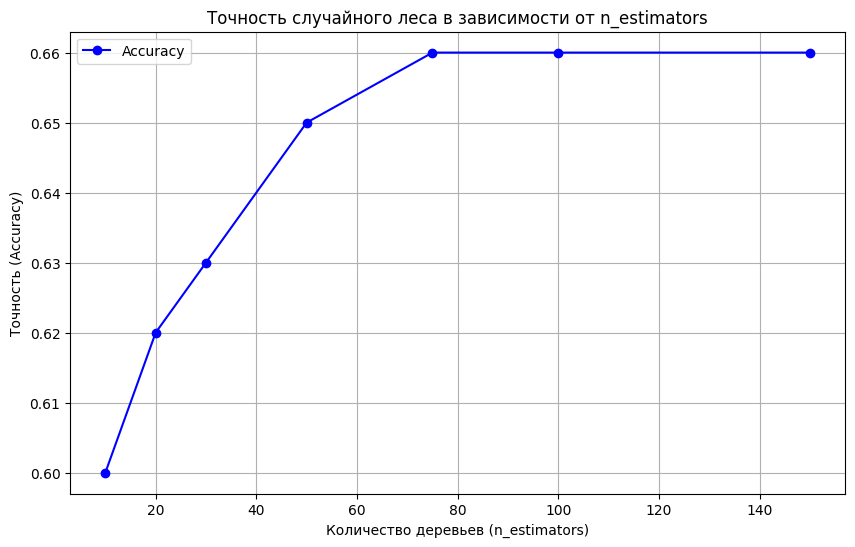

In [63]:
import matplotlib.pyplot as plt

# Примерные данные: точности и количество деревьев
n_estimators_values = [10, 20, 30, 50, 75, 100, 150]
accuracies = [0.6, 0.62, 0.63, 0.65, 0.66, 0.66, 0.66]

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title('Точность случайного леса в зависимости от n_estimators')
plt.xlabel('Количество деревьев (n_estimators)')
plt.ylabel('Точность (Accuracy)')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Сетка значений max_depth для проверки
param_grid = {'max_depth': [3, 5, 7, 10]}

# Создаем базовую модель градиентного бустинга
model = GradientBoostingClassifier(random_state=42)

# Поиск по сетке с использованием кросс-валидации
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_preprocessed, y_train)

# Лучший параметр
best_max_depth = grid_search.best_params_['max_depth']
print(f"Оптимальное значение max_depth: {best_max_depth}")

# Обучим модель с найденным значением max_depth
best_model = GradientBoostingClassifier(max_depth=best_max_depth, random_state=42)
best_model.fit(X_train_preprocessed, y_train)

# Оценим модель на тестовой выборке
y_pred = best_model.predict(X_test_preprocessed)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Точность на тестовой выборке: {test_accuracy:.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Оптимальное значение max_depth: 7
Точность на тестовой выборке: 0.68


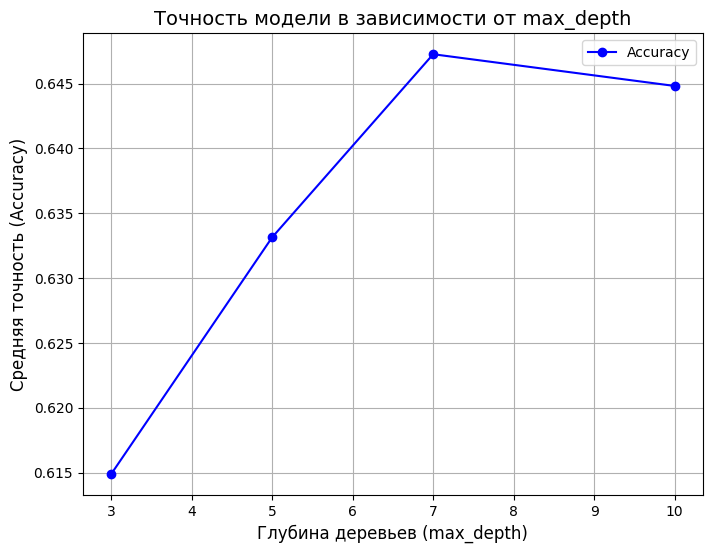

In [69]:
import matplotlib.pyplot as plt

# Данные точности для разных значений max_depth из grid_search
mean_scores = grid_search.cv_results_['mean_test_score']
param_values = [param['max_depth'] for param in grid_search.cv_results_['params']]

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(param_values, mean_scores, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title('Точность модели в зависимости от max_depth', fontsize=14)
plt.xlabel('Глубина деревьев (max_depth)', fontsize=12)
plt.ylabel('Средняя точность (Accuracy)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()